In [26]:
import numpy as np
import pymc3 as pm
from pymc3.distributions.timeseries import GaussianRandomWalk
import pandas as pd
from scipy import optimize

%pylab inline

n = 252
returns=[]
for val in pd.read_csv("SP500.csv")['VALUE']:
    if val != '.':
        returns.append(float(val))
# returns = np.genfromtxt(pd.read_csv("SP500.csv")['VALUE'])[-n:]
returns[:5]

Populating the interactive namespace from numpy and matplotlib


[2058.2, 2020.58, 2002.61, 2025.9, 2062.14]

In [32]:
with model:
    sigma = pm.Exponential('sigma', 1./.02, testval=.1)

    nu = pm.Exponential('nu', 1./10)
    s = GaussianRandomWalk('s', sigma**-2, shape=n)

    r = pm.StudentT('r', nu, lam=pm.math.exp(-2*s), observed=returns)

ValueError: Variable name sigma_log_ already exists.

In [28]:
with model:
    trace = pm.sample(2000, tune=1000)[1000:]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -2,901.3: 100%|██████████| 200000/200000 [00:31<00:00, 6348.61it/s]
Finished [100%]: Average ELBO = -2,845.5
100%|██████████| 2000/2000 [14:42<00:00,  2.92it/s]


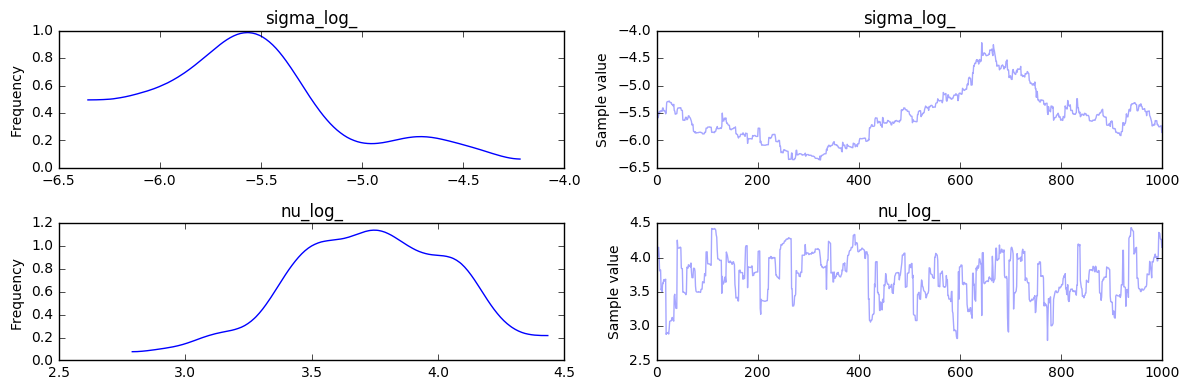

In [30]:
figsize(12,6)
pm.traceplot(trace, model.vars[:-1]);